In [2]:
%matplotlib inline


k-means
=======

This example uses $k$-means clustering for time series. Three variants of the algorithm are available: standard
Euclidean $k$-means, DBA-$k$-means (for DTW Barycenter Averaging) and Soft-DTW $k$-means.




In [35]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train
X_train = X_train[y_train < 5 ] # Keep first 3 classes$
numpy.random.shuffle(X_train)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:100])  # Keep only 50 time series
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)  # Make time series shorter
sz = X_train.shape[1]
print (X_train.shape)
plt.show()
for elem in X_train:
    df=pd.DataFrame(elem)
    plt.plot(df)
    
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 200 but corresponding boolean dimension is 100

In [39]:
X_train


array([[[ 0.54407],
        [ 0.65786],
        [ 0.61124],
        ...,
        [ 0.60377],
        [ 0.59633],
        [ 0.58322]],

       [[ 0.76643],
        [ 0.62463],
        [ 0.74225],
        ...,
        [ 0.72218],
        [ 0.66786],
        [ 0.72445]],

       [[-2.045  ],
        [-2.0917 ],
        [-2.0776 ],
        ...,
        [ 0.52429],
        [ 0.54742],
        [ 0.57056]],

       ...,

       [[ 0.80689],
        [ 0.81192],
        [ 0.8078 ],
        ...,
        [ 0.76162],
        [ 0.83456],
        [ 0.75248]],

       [[-1.9341 ],
        [-1.9663 ],
        [-1.9511 ],
        ...,
        [ 0.54292],
        [ 0.58843],
        [ 0.53418]],

       [[-1.4311 ],
        [-1.455  ],
        [-1.4689 ],
        ...,
        [ 0.7409 ],
        [ 0.7651 ],
        [ 0.77887]]])

Euclidean k-means
10.146 --> 5.552 --> 5.524 --> 5.511 --> 5.511 --> 


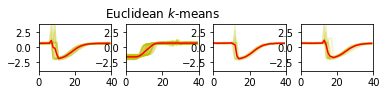

In [30]:
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=4, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)
plt.figure()
for yi in range(4):
    plt.subplot(4, 4, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "y-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")




DBA k-means
Init 1
1.617 --> 0.540 --> 0.506 --> 0.473 --> 0.468 --> 0.468 --> 


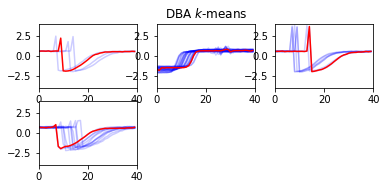

In [19]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=4, n_init=2, metric="dtw", verbose=True, max_iter_barycenter=10, random_state=seed)
y_pred = dba_km.fit_predict(X_train)
for yi in range(4):
    plt.subplot(3, 3, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "b-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("DBA $k$-means")



Soft-DTW k-means
4.817 --> 0.257 --> 0.197 --> 0.189 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 0.185 --> 


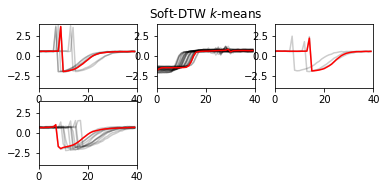

In [20]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=4, metric="softdtw", metric_params={"gamma_sdtw": .01},
                           verbose=True, random_state=seed)
y_pred = sdtw_km.fit_predict(X_train) 

for yi in range(4):
    plt.subplot(3, 3, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")


In [ ]:
print ( X_train.shape)

In [1]:
import os

In [40]:
ECGI = pd.read_csv("C:/Users/ELAM/AtrialFibrilationDimension1_TEST.csv")

In [42]:
ECG=ECGI.drop(columns=['target'])

In [44]:
ECG

,channel_0_0,channel_0_1,channel_0_2,channel_0_3,channel_0_4,channel_0_5,channel_0_6,channel_0_7,channel_0_8,channel_0_9,...,channel_0_630,channel_0_631,channel_0_632,channel_0_633,channel_0_634,channel_0_635,channel_0_636,channel_0_637,channel_0_638,channel_0_639
0,0.41990,0.35568,0.25688,0.18278,0.12844,0.06916,0.02470,0.00000,-0.00494,-0.00988,...,0.00494,0.33592,0.87932,0.85462,0.30134,-0.01482,0.00000,0.04940,0.02964,0.00000
1,-0.02470,-0.01976,-0.03952,-0.03458,-0.03458,-0.03952,-0.04940,-0.03458,-0.03458,-0.04940,...,-0.08398,-0.09386,-0.09386,-0.06916,-0.09880,-0.07904,-0.08398,-0.07904,-0.09880,-0.07904
2,-0.02964,0.01482,0.00988,0.04446,0.05928,0.07904,0.09386,0.11856,0.13338,0.14820,...,0.05928,0.08398,0.08892,0.12844,0.12350,0.12350,0.10868,0.07904,0.04940,0.02470
3,-0.06422,-0.04446,-0.06422,-0.08398,-0.08892,-0.12350,-0.08892,-0.10374,-0.06422,-0.09386,...,-0.18278,-0.11856,-0.14326,-0.11362,-0.11856,-0.05434,-0.08398,-0.03952,-0.04446,0.01976
4,-0.11264,-0.09152,-0.07744,-0.04224,-0.00704,-0.00704,0.03520,0.07040,0.08448,0.11968,...,-0.13376,-0.15488,-0.15488,-0.16192,-0.17600,-0.11968,-0.16192,-0.13376,-0.14784,-0.14784
5,-0.15314,-0.10374,-0.04940,0.03952,0.01976,0.04940,-0.05928,-0.00494,0.25688,0.97812,...,-0.13338,-0.20254,-0.18772,-0.21736,-0.17784,-0.14326,-0.13832,-0.14820,-0.13338,-0.12844
6,-0.05391,-0.06589,-0.08386,-0.04792,-0.06589,-0.07787,-0.07188,-0.09584,-0.02995,-0.05391,...,-0.04193,0.07188,0.11381,0.11980,0.19767,0.22163,0.10782,0.09584,0.11381,0.09584
7,0.12844,0.12844,0.16302,0.17290,0.16796,0.15314,0.17784,0.15314,0.12844,0.14820,...,-0.06422,-0.06916,-0.06422,-0.05928,-0.08398,-0.07904,-0.09880,-0.10868,-0.09386,-0.08398
8,-0.08398,-0.08398,-0.06916,-0.05928,-0.06422,-0.06916,-0.06916,-0.08398,-0.08892,0.06422,...,-0.11362,-0.12350,-0.12844,-0.10868,-0.12350,-0.11362,-0.06916,-0.06422,-0.04940,-0.01482
9,-0.05928,-0.04446,-0.05434,-0.05928,-0.04940,-0.03458,-0.03458,-0.04446,-0.05928,-0.02964,...,-0.20254,-0.22724,-0.22724,-0.13832,-0.13832,-0.14326,-0.12844,-0.10868,-0.10868,-0.09386


In [63]:
series = list()
for i in range(len(ECG)):
    series.append(ECG.iloc[i])
series = np.array(series)
#series = TimeSeriesResampler(sz=150).fit_transform(series)
series

array([[ 0.4199 ,  0.35568,  0.25688, ...,  0.0494 ,  0.02964,  0.     ],
       [-0.0247 , -0.01976, -0.03952, ..., -0.07904, -0.0988 , -0.07904],
       [-0.02964,  0.01482,  0.00988, ...,  0.07904,  0.0494 ,  0.0247 ],
       ...,
       [-0.03425, -0.03425, -0.02055, ..., -0.0274 , -0.0137 , -0.0274 ],
       [-0.10868, -0.11856, -0.16302, ..., -0.08892, -0.08398, -0.0988 ],
       [-0.07137, -0.01647, -0.01098, ...,  0.07137,  0.04392,  0.     ]])

Euclidean k-means
44.345 --> 31.942 --> 31.942 --> 


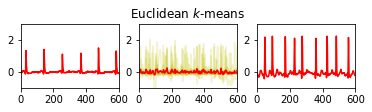

In [68]:
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(series)
plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in series[y_pred == yi]:
        plt.plot(xx.ravel(), "y-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 600)
    plt.ylim(-1, 3)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [69]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3, n_init=2, metric="dtw", verbose=True, max_iter_barycenter=10, random_state=seed)
y_pred = dba_km.fit_predict(series)
for yi in range(3):
    plt.subplot(3, 3, 1 + yi)
    for xx in series[y_pred == yi]:
        plt.plot(xx.ravel(), "b-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 650)
    plt.ylim(-0.4, 2)
    if yi == 1:
        plt.title("DBA $k$-means")


DBA k-means
Init 1


KeyboardInterrupt: 

Soft-DTW k-means
100.323 --> 23.173 --> 23.632 --> 23.586 --> 23.662 --> 


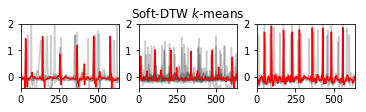

In [72]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,max_iter=5, metric="softdtw", metric_params={"gamma_sdtw": .01},
                           verbose=True, random_state=seed)
y_pred = sdtw_km.fit_predict(series) 

for yi in range(3):
    plt.subplot(3, 3, 1 + yi)
    for xx in series[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 640)
    plt.ylim(-0.4, 2)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

In [53]:
ECG.columns = range(ECG.shape[1])
print (ECGI['target'])

0     n
1     n
2     n
3     n
4     n
5     s
6     s
7     s
8     s
9     s
10    t
11    t
12    t
13    t
14    t
Name: target, dtype: object


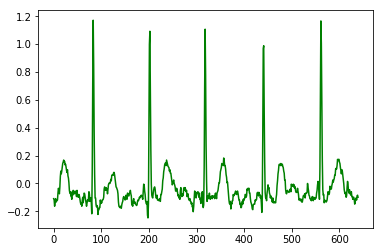

In [68]:
import pylab
from pylab import figure as fig
plt.plot(pd.Series(ECG.iloc[13]),color='g')
pylab.savefig("typeTEcg.png",)
#plt.plot(pd.Series(ECG.iloc[7]))
#plt.plot(pd.Series(ECG.iloc[12]))

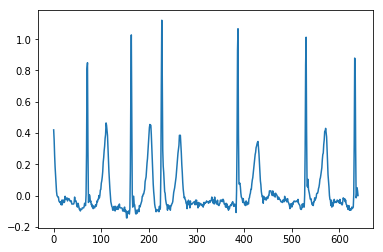

In [45]:
plt.plot(pd.Series(ECG.iloc[0]))

In [ ]:
adiac = pd.re